[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


NLP Sentiment Accuracy: 0.8125


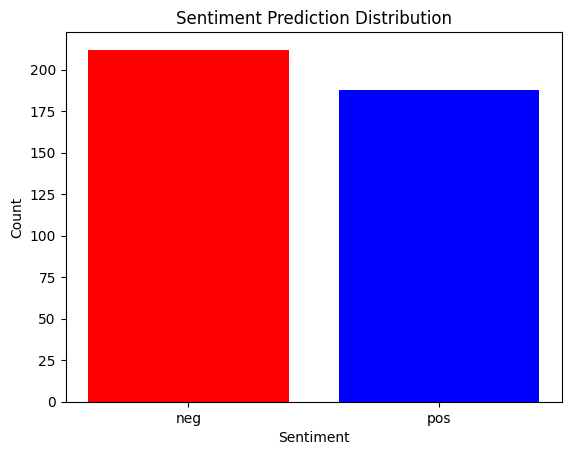

In [3]:
# ==============================
# 💬 NATURAL LANGUAGE PROCESSING (Movie Review Sentiment)
# ==============================

import nltk
import random
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Download dataset
nltk.download('movie_reviews')

# Prepare data
docs = [(movie_reviews.raw(fileid), category)
        for category in movie_reviews.categories()
        for fileid in movie_reviews.fileids(category)]
random.shuffle(docs)

texts = [text for text, label in docs]
labels = [label for text, label in docs]

# Split data
split = int(len(texts)*0.8)
X_train, X_test = texts[:split], texts[split:]
y_train, y_test = labels[:split], labels[split:]

# Convert text to numeric features
vectorizer = CountVectorizer(max_features=2000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train model
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict and evaluate
preds = clf.predict(X_test_vec)
print("NLP Sentiment Accuracy:", accuracy_score(y_test, preds))

# Visualization: bar chart of predicted sentiment counts
unique, counts = np.unique(preds, return_counts=True)
plt.bar(unique, counts, color=['red', 'blue'])
plt.title("Sentiment Prediction Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

